In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_20newsgroups
train=fetch_20newsgroups(subset='train')
test=fetch_20newsgroups(subset='test')

In [3]:
from nltk.tokenize import word_tokenize

In [4]:
word_tokenize('I like sushi.')

['I', 'like', 'sushi', '.']

In [5]:
word_data_train=list(map(word_tokenize,train['data']))

In [6]:
word_data_train[0][:10]

['From', ':', 'lerxst', '@', 'wam.umd.edu', '(', 'where', "'s", 'my', 'thing']

In [7]:
word_data_test=list(map(word_tokenize,test['data']))

In [15]:
import gensim

- gensimは「topic modeling for humans」を標語にしている。
    - for humansとか言ってるイキりライブラリはよくある。
- オレオレクラスが多くて個人的にはイライラする。
    - でも一番使われている。
    - nltk(natural language tool kit)もそんなかんじ。

In [16]:
dictionary = gensim.corpora.Dictionary(word_data_train)
dictionary.filter_extremes(no_below=100, no_above=0.5)

In [17]:
corpus = [dictionary.doc2bow(text) for text in word_data_train]

In [18]:
lda = gensim.models.ldamodel.LdaModel(
    corpus=corpus, num_topics=20, id2word=dictionary,alpha=[1]*20
)

In [19]:
lda.show_topic(14)

[('was', 0.020281469),
 ('he', 0.012613773),
 ('as', 0.010677373),
 ('by', 0.010472091),
 ("n't", 0.010327066),
 ('who', 0.0095243817),
 ('they', 0.0092332698),
 ('would', 0.0084476518),
 ('but', 0.0081775468),
 ('from', 0.0081637399)]

- topicごとの単語分布の上位が出てるっぽい。
    - ありがちな単語が上位にくる。
    - あたりまえ。

In [20]:
test_corpus= [dictionary.doc2bow(text) for text in word_data_test]

In [21]:
result=lda[test_corpus]

In [22]:
result[0]

[(0, 0.32903463),
 (1, 0.030464089),
 (2, 0.012825717),
 (3, 0.034294646),
 (4, 0.030888585),
 (5, 0.025370006),
 (6, 0.026286503),
 (7, 0.032179095),
 (8, 0.031872544),
 (9, 0.017267423),
 (10, 0.022724975),
 (11, 0.026530139),
 (12, 0.18672748),
 (13, 0.033387575),
 (14, 0.032687195),
 (15, 0.018478792),
 (16, 0.019769419),
 (17, 0.026024839),
 (18, 0.039725535),
 (19, 0.023460807)]

In [23]:
pred_labels=[sorted(r,key=lambda x:x[1],reverse=True)[0][0] for r in result]
pred_labels[:10]

[0, 5, 4, 14, 6, 6, 14, 5, 10, 11]

In [24]:
# https://www.haya-programming.com/entry/2018/03/15/070029

from scipy.stats import entropy
import pandas as pd

def entropy_score(true_y, cl_y):
    df = pd.crosstab(cl_y, true_y)
    arr = df.as_matrix()

    weight = arr.sum(axis=1)
    weight = weight/(weight.sum())

    cl_entropy = np.array([entropy(cl, base=2) for cl in arr])
    return (cl_entropy*weight).sum()

In [25]:
entropy_score(test['target'],pred_labels)

4.3140393826704431

- 最悪はlog2(20)≒4.32なので、ほぼ最悪。
- このデータセットではトピックが偏っていない。
    - 多項分布を仮定するのが間違ってるみたいなところがある。

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline

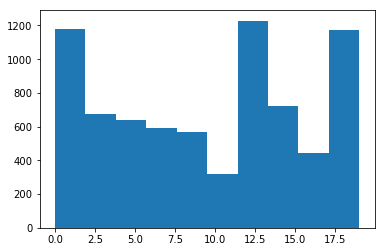

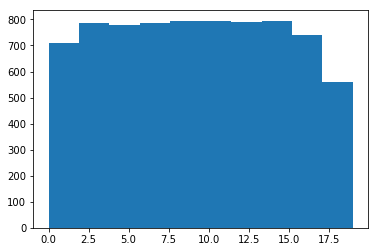

In [27]:
plt.hist(pred_labels)
plt.show()

plt.hist(test['target'])
plt.show()

- sklearnにもLatentDirichletAllocation関数がある。
    - 別のLDAもあったらしいので、混同しないようにする。